# Results condition-average MVPA

One of the reviewers suggested to apply MVPA on condition-average patterns instead of single-trial patterns,
as the reviewer reasonably argued that single-trial patterns (i.e. beta-weights or corresponding t-values) are
difficult to estimate in experimental designs with short interstimulus intervals, like ours (we implemented an ISI of 2 seconds for both the self- and other-task). A previous study indeed found that longer ISIs in MVPA-type analyses improve sensitivity (e.g. [Visser, de Haan, Beemsterboer, Haver, Kindt, & Scholte, 2016](http://onlinelibrary.wiley.com/doi/10.1111/psyp.12665/abstract)). However, while sensitivity is clearly reduced, it has also been shown that short ISIs do not introduce bias *given that the stimulus-presentation is fully randomized for each subject* (see [Mumford, Davis, & Poldrack, 2014](http://www.sciencedirect.com/science/article/pii/S105381191400768X)).

To follow up on the reviewer's advice, we performed between-subject MVPA using condition-average patterns of t-values of each subject. This amounted to a samples x features matrix of shape 120 x 269241 for the self-data (120 = 20 subjects * 3 conditions [act, int, sit] * 2 runs), and a sample x features matrix of shape 90 x 269241 for the other-data (90 = 20 subjects * 3 conditions). The 269241 features, here, refer to all gray-matter voxels in MNI152 (2mm) space. The actual analysis-scripts are archived in the Shared States Github-repository, in the 'extra_analyses' directory: https://github.com/lukassnoek/SharedStates/tree/master/ANALYSES/extra_analyses. Note that the these analyses depend on a newer version of the *skbold* package than the original analyses; this code should be compatible with the current state of the master branch. (The skbold-code used for the original main analyses can be checked out on the *SharedStates* branch on Github!). 

In [1]:
import os
import os.path as op
import numpy as np
import nibabel as nib
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Note: the 'reverse' analyses (i.e. MVPA on the other-data and cross-decoding from other-to-self), which were requested by another reviewer, are reported here for completeness as well.

In [3]:
base_dir = '/media/lukas/data/SharedStates/RESULTS/MVPA/Validation/Condition_average_mvpa/'
self_dir = op.join(base_dir, 'self')
other_dir = op.join(base_dir, 'other')
so_dir = op.join(base_dir, 'self>>other')
os_dir = op.join(base_dir, 'other>>self')
plot_dir = '/media/lukas/data/SharedStates/ARTICLE/Plots'

## Self-analysis

In [4]:
self_scores = pd.read_csv(op.join(self_dir, 'results.tsv'), sep='\t')
perms = glob(op.join(self_dir, 'perm*', 'results.tsv'))
perm_scores = pd.concat([pd.read_csv(p, sep='\t').mean() for p in perms], axis=1).T

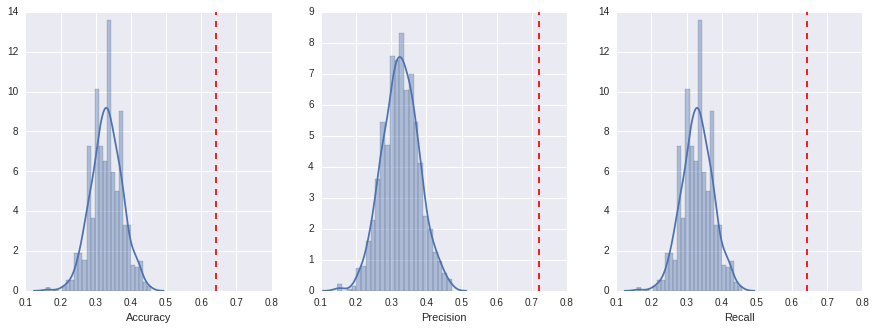

In [5]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15, 5))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    sns.distplot(perm_scores[metric], ax=ax[i])
    ax[i].axvline(x=self_scores.mean()[metric], color='r', linestyle='--')

In [6]:
self_mean_scores = self_scores.mean()

for metric in ['Accuracy', 'Precision', 'Recall']:
    
    obs = self_mean_scores[metric]
    permuted = perm_scores[metric]
    p = (permuted > obs).sum() / len(permuted)
    print('P-value for %s (%.3f): %.3f' % (metric, obs, p))

P-value for Accuracy (0.642): 0.000
P-value for Precision (0.719): 0.000
P-value for Recall (0.642): 0.000


## Self >> Other

In [7]:
so_scores = pd.read_csv(op.join(so_dir, 'results.tsv'), sep='\t')
perms = glob(op.join(so_dir, 'perm*', 'results.tsv'))
perm_scores = pd.concat([pd.read_csv(p, sep='\t').mean() for p in perms], axis=1).T

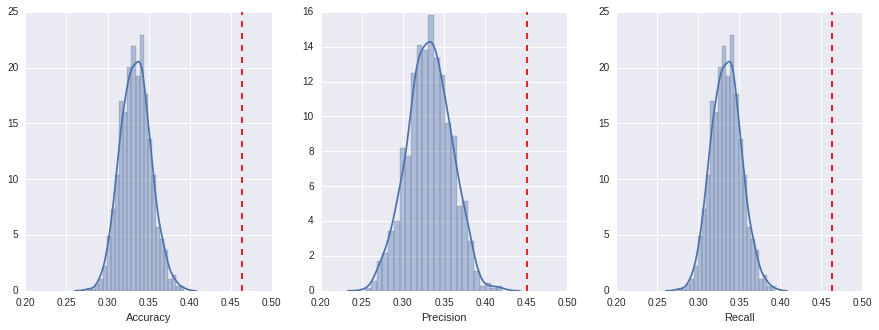

In [8]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15, 5))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    sns.distplot(perm_scores[metric], ax=ax[i])
    ax[i].axvline(x=so_scores.mean()[metric], color='r', linestyle='--')

In [9]:
so_mean_scores = so_scores.mean()

for metric in ['Accuracy', 'Precision', 'Recall']:
    so_scores = pd.read_csv(op.join(so_dir, 'results.tsv'), sep='\t')
    obs = so_mean_scores[metric]
    permuted = perm_scores[metric]
    p = (permuted > obs).sum() / len(permuted)
    print('P-value for %s (%.3f): %.3f' % (metric, obs, p))

P-value for Accuracy (0.463): 0.000
P-value for Precision (0.451): 0.000
P-value for Recall (0.463): 0.000


## Other

In [10]:
other_scores = pd.read_csv(op.join(other_dir, 'results.tsv'), sep='\t')
perms = glob(op.join(other_dir, 'perm*', 'results.tsv'))
perm_scores = pd.concat([pd.read_csv(p, sep='\t').mean() for p in perms], axis=1).T

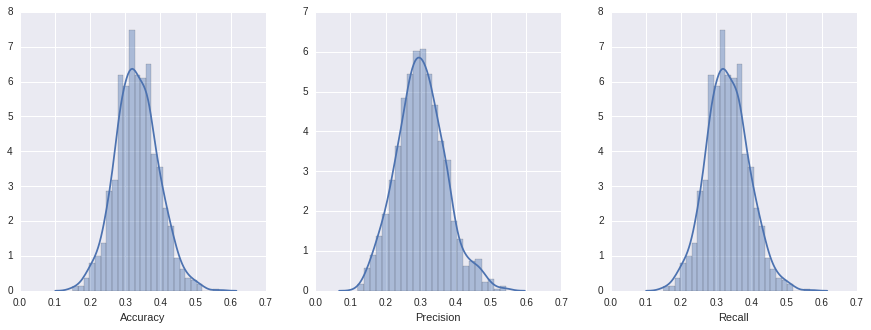

In [11]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15, 5))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    sns.distplot(perm_scores[metric], ax=ax[i])
    ax[i].aso_scores = pd.read_csv(op.join(so_dir, 'results.tsv'), sep='\t')

In [12]:
other_mean_scores = other_scores.mean()

for metric in ['Accuracy', 'Precision', 'Recall']:
    
    obs = other_mean_scores[metric]
    permuted = perm_scores[metric]
    p = (permuted > obs).sum() / len(permuted)
    print('P-value for %s (%.3f): %.3f' % (metric, obs, p))

P-value for Accuracy (0.617): 0.000
P-value for Precision (0.613): 0.000
P-value for Recall (0.617): 0.000


## Other >> self

In [13]:
os_scores = pd.read_csv(op.join(os_dir, 'results.tsv'), sep='\t')
perms = glob(op.join(os_dir, 'perm*', 'results.tsv'))
perm_scores = pd.concat([pd.read_csv(p, sep='\t').mean() for p in perms], axis=1).T

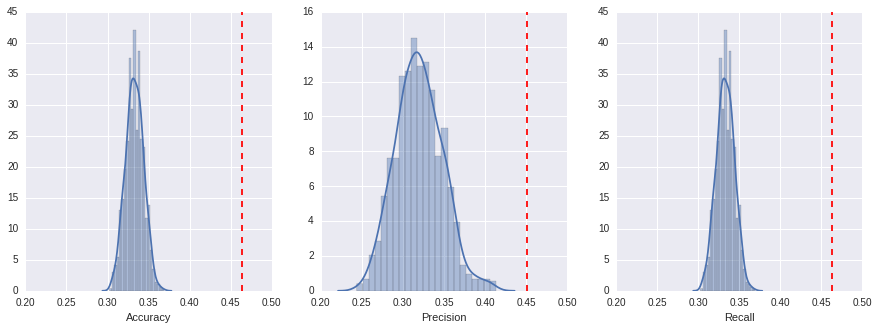

In [14]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15, 5))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    sns.distplot(perm_scores[metric], ax=ax[i])
    ax[i].axvline(x=so_scores.mean()[metric], color='r', linestyle='--')

In [15]:
os_mean_scores = os_scores.mean()

for metric in ['Accuracy', 'Precision', 'Recall']:
    obs = os_mean_scores[metric]
    permuted = perm_scores[metric]
    p = (permuted > obs).sum() / len(permuted)
    print('P-value for %s (%.3f): %.3f' % (metric, obs, p))

P-value for Accuracy (0.390): 0.000
P-value for Precision (0.545): 0.000
P-value for Recall (0.390): 0.000


In [16]:
os_cm = np.load(op.join(os_dir, 'confmat.npy'))
perms = glob(op.join(os_dir, 'perm*', 'confmat.npy'))

In [17]:
os_recall = np.zeros_like(os_cm)
os_precision = np.zeros_like(os_cm)

for i in range(os_cm.shape[0]):
    
    os_recall[i, :, :] = os_cm[i, : , : ] / os_cm[i, :, :].sum(axis=1)
    os_precision[i, :, :] = os_cm[i, : , : ] / os_cm[i, :, :].sum(axis=0)

os_recall = os_recall.mean(axis=0)
os_precision = os_precision.mean(axis=0)

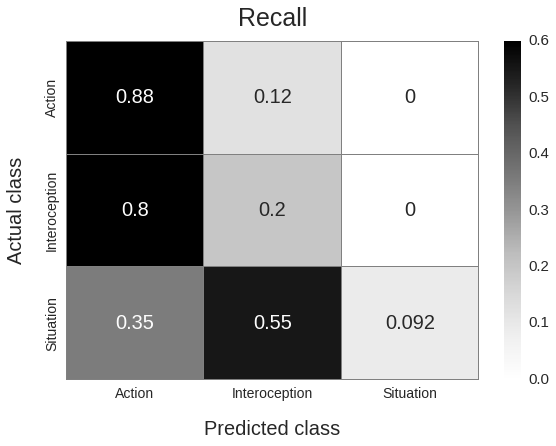

In [18]:
labels = ['Action', 'Interoception', 'Situation']
plt.figure(figsize=(8,6))
ax = sns.heatmap(os_recall, cmap=plt.cm.Greys, annot=True,
                 linewidths=0.1, linecolor='grey', vmax=.6, cbar=True, annot_kws={'fontsize': 20})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)
plt.xticks(np.arange(3)+0.5, labels, fontsize=14)
plt.yticks(np.arange(3)+0.5, labels[::-1], fontsize=14)
plt.xlabel('Predicted class', fontsize=20, labelpad=19)
plt.ylabel('Actual class', fontsize=20, labelpad=19)
plt.title('Recall', fontsize=25, y=1.03)
plt.tight_layout(pad=0.1)
plt.savefig(op.join(plot_dir, 'recall_other_to_self.png'))

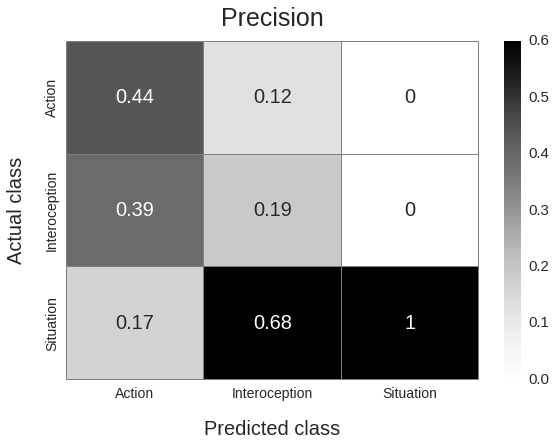

In [19]:
labels = ['Action', 'Interoception', 'Situation']
plt.figure(figsize=(8,6))
ax = sns.heatmap(os_precision, cmap=plt.cm.Greys, annot=True,
                 linewidths=0.1, linecolor='grey', vmax=.6, cbar=True, annot_kws={'fontsize': 20})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)
plt.xticks(np.arange(3)+0.5, labels, fontsize=14)
plt.yticks(np.arange(3)+0.5, labels[::-1], fontsize=14)
plt.xlabel('Predicted class', fontsize=20, labelpad=19)
plt.ylabel('Actual class', fontsize=20, labelpad=19)
plt.title('Precision', fontsize=25, y=1.03)
plt.tight_layout(pad=0.1)
plt.savefig(op.join(plot_dir, 'precision_other_to_self.png'))

In [20]:
perm_scores = np.concatenate([np.load(c) / np.load(c).sum(axis=0) for c in perms])
print('RECALL:')
print((os_recall < perm_scores).sum(axis=0) / float(len(perm_scores)))
print('\nPRECISION:')
print((os_precision < perm_scores).sum(axis=0) / float(len(perm_scores)))

RECALL:
[[  0.00000000e+00   3.46000000e-01   8.87400000e-01]
 [  0.00000000e+00   1.58100000e-01   8.86200000e-01]
 [  5.00000000e-04   3.00000000e-04   4.38800000e-01]]

PRECISION:
[[ 0.      0.3423  0.8874]
 [ 0.      0.1716  0.8862]
 [ 0.1682  0.      0.    ]]


## Plotting 

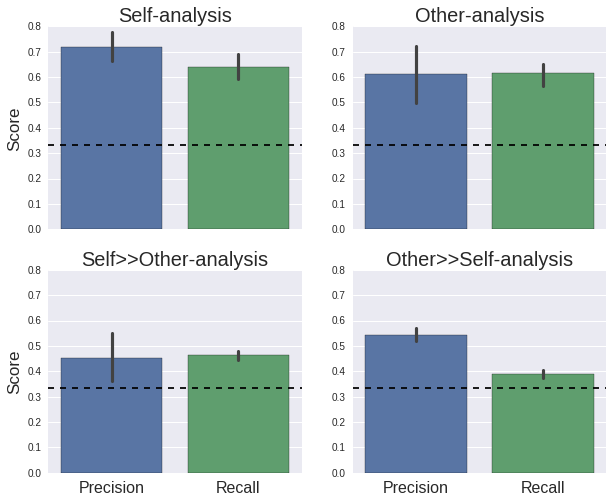

In [23]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(10, 8))

sns.barplot(data=self_scores[['Precision', 'Recall']], ax=ax[0][0])
ax[0][0].axhline(y=0.33333, color='k', linestyle='--')
ax[0][0].set_title('Self-analysis', size=20)
ax[0][0].set_ylabel('Score', fontsize=17)

sns.barplot(data=other_scores[['Precision', 'Recall']], ax=ax[0][1])
ax[0][1].axhline(y=0.33333, color='k', linestyle='--')
ax[0][1].set_title('Other-analysis', size=20)

sns.barplot(data=so_scores[['Precision', 'Recall']], ax=ax[1][0])
ax[1][0].axhline(y=0.33333, color='k', linestyle='--')
ax[1][0].set_title('Self>>Other-analysis', size=20)
ax[1][0].set_ylim((0, 0.8))
ax[1][0].set_xticklabels(['Precision', 'Recall'], fontsize=16)
ax[1][0].set_ylabel('Score', fontsize=17)

sns.barplot(data=os_scores[['Precision', 'Recall']], ax=ax[1][1])
ax[1][1].axhline(y=0.33333, color='k', linestyle='--')
ax[1][1].set_title('Other>>Self-analysis', size=20)
ax[1][1].set_ylim((0, 0.8))
ax[1][1].set_xticklabels(['Precision', 'Recall'], fontsize=16)

fig.savefig(op.join(plot_dir, 'Condition_average_plots.png'))

## Comparison single-trial & condition-average


In [24]:
import scipy.stats as stats
st_scores = pd.read_csv('/media/lukas/data/SharedStates/DATA/BEHAVIORAL/validation_behav.csv')

In [25]:
print(stats.ttest_ind(st_scores['self_precision'], self_scores['Precision']))

Ttest_indResult(statistic=-3.0643255010610027, pvalue=0.0047879914130921526)


In [26]:
print(self_scores['Precision'].mean(), self_scores['Precision'].std())
print(st_scores['self_precision'].mean(), st_scores['self_precision'].std())
print('df = n1 + n2 - 2 = %i' % (len(self_scores) + len(st_scores) - 2))

(0.71917989417999995, 0.10001020589380238)
(0.58892730475999999, 0.11407417167533727)
df = n1 + n2 - 2 = 28


In [27]:
print(stats.ttest_ind(st_scores['cross_precision'], so_scores['Precision']))

Ttest_indResult(statistic=-0.14501710524885722, pvalue=0.88573622586231116)
